In [2]:
import numpy as np
import pandas as pd

from math import dist

In [3]:
# unused
class Grid:

    def __init__(self, grid: pd.DataFrame) -> None:
        self.grid = grid

In [4]:
class Location:
    def __init__(self, grid: pd.DataFrame, coordinates: tuple, logo: str) -> None:
        self.coordinates = coordinates
        self.logo = logo
        # type could be an enum
        self.placeOnGrid(grid)
    
    def placeOnGrid(self, dataframe):
        row,col = self.coordinates
        dataframe[row][col] = self.logo

class Building(Location):

    def __init__(self, grid: pd.DataFrame, coordinates: tuple, logo: str) -> None:
        super().__init__(grid, coordinates, logo)
    

In [5]:
class Road:

    def __init__(self, connected_buildings: list, lanes: int, cylcing_lanes: int, bidirectional=True) -> None:
        pass

In [6]:
height = 10
width = 15

In [7]:
grid_base = [['.' for j in range(width)] for i in range(height)]
grid = pd.DataFrame(grid_base)
grid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
4,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
5,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
6,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
7,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
8,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
9,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.


In [8]:
shop = Building(grid, (7, 4), 'S')
home = Building(grid,(10, 8), 'H')
work = Building(grid, (7, 8), 'W')

grid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
4,.,.,.,.,.,.,.,S,.,.,.,.,.,.,.
5,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
6,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
7,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
8,.,.,.,.,.,.,.,W,.,.,H,.,.,.,.
9,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.


this could be a solution for properly shaped arrays ..?

In [9]:
#import coo from sparse
#from scipy.sparse import coo_matrix


In [10]:
# use physics module for the calculation
# https://fangohr.github.io/blog/physical-quantities-numerical-value-with-units-in-python.html

Create Person and walk

In [11]:
from random import randint


class Person:

    def __init__(self, grid: pd.DataFrame, km_per_h=5) -> None:
        self.position = (randint(0, grid.shape[0]), randint(0, grid.shape[1]))
        self.km_per_h = km_per_h

    def walk(self, destination: Location):
        distance = dist(self.position, destination.coordinates)
        print(f'The distance is {distance: 0.2f} metres.')
        self.position = destination.coordinates
        print(f'This took {(distance/1000)/(self.km_per_h/3.6) * 60: 0.2f} minutes')


In [12]:
adriana = Person(grid)
adriana.position

(8, 11)

In [13]:
adriana.walk(shop)
adriana.position

The distance is  7.07 metres.
This took  0.31 minutes


(7, 4)

### General networkx

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
G = nx.Graph()
G.add_node(1, label="Node 1")
G.add_node(2)
G.add_node(3)
G.add_node(4)

In [16]:
# You can also add attributes to the nodes and edges, such as weights or labels:
G.add_edge(1, 2, weight=0.1)
G.add_edge(2, 3, weight=1)
G.add_edge(2, 4, weight=5)

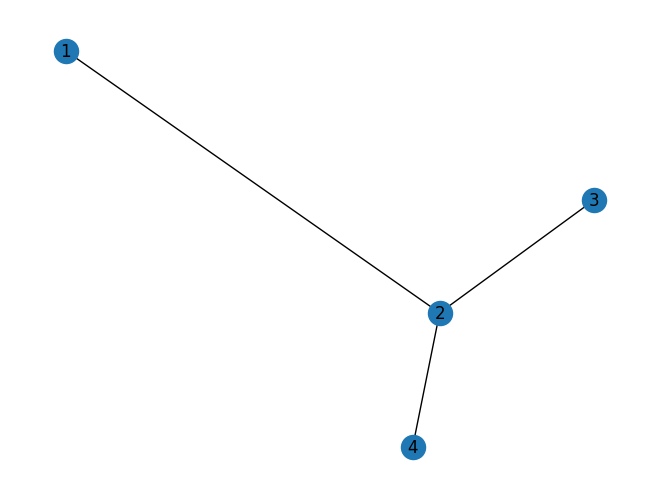

In [17]:
nx.draw(G, with_labels=True)
plt.show()

### More specific networkx

In [18]:
grid_graph = nx.Graph()

grid_graph.add_node(1, label="SHOP")
grid_graph.add_node(2, label="HOME")

grid_graph.add_edge(2, 1, weight=1)


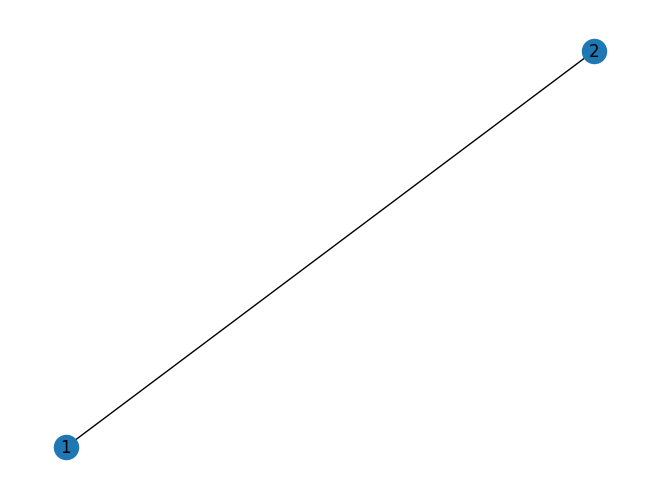

In [19]:
nx.draw(grid_graph, with_labels=True)
plt.show()

In [20]:
grid_graph.nodes[1]

{'label': 'SHOP'}

### ChatGPT suggestions

In [46]:
# Define the environment: a graph representing a city grid
G = nx.Graph()

num_rows, num_cols = grid.shape

# Add nodes to the graph, one for each cell in the grid
for i in range(num_rows):
    for j in range(num_cols):
        G.add_node((i, j), pos=(i, j))

# Add edges to the graph to represent the connections between cells
for i in range(num_rows):
    for j in range(num_cols):
        if i > 0: # only for cases on the edge
            G.add_edge((i, j), (i - 1, j), weight=50, speed=50)
            G.add_edge((i, j), (i - 1, j), weight=10, speed=10)
        if i < num_rows - 1: # only for cases on the edge
            G.add_edge((i, j), (i + 1, j), weight=50, speed=50)
            G.add_edge((i, j), (i + 1, j), weight=10, speed=10)
        if j > 0: # only for cases on the edge
            G.add_edge((i, j), (i, j - 1), weight=50, speed=50)
            G.add_edge((i, j), (i, j - 1), weight=10, speed=10)
        if j < num_cols - 1: # only for cases on the edge
            G.add_edge((i, j), (i, j + 1), weight=50, speed=50)
            G.add_edge((i, j), (i, j + 1), weight=10, speed=10)

In [47]:
G.get_edge_data(1,1)

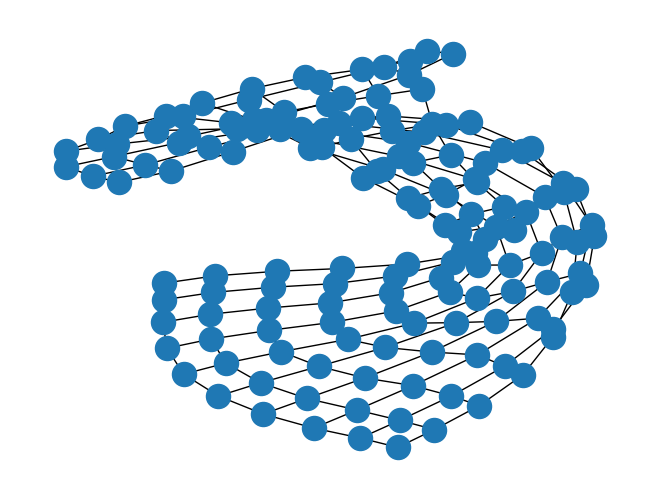

In [48]:
nx.draw(G)
plt.show()